<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-qi/blob/master/porosity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/yohanesnuwara/reservoir-qi

Cloning into 'reservoir-qi'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 68 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


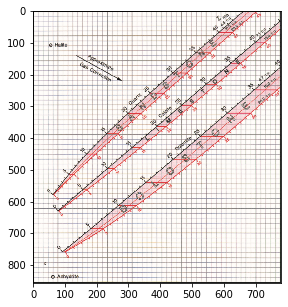

In [4]:
neutron_density_xplot = plt.imread('/content/reservoir-qi/well-log-charts/Fig 4.11 Neutron-density crossplot.PNG')
plt.figure(figsize=(15, 5))
plt.imshow(neutron_density_xplot)

Text(0, 0.5, 'Bulk Density (*150 g/cc)')

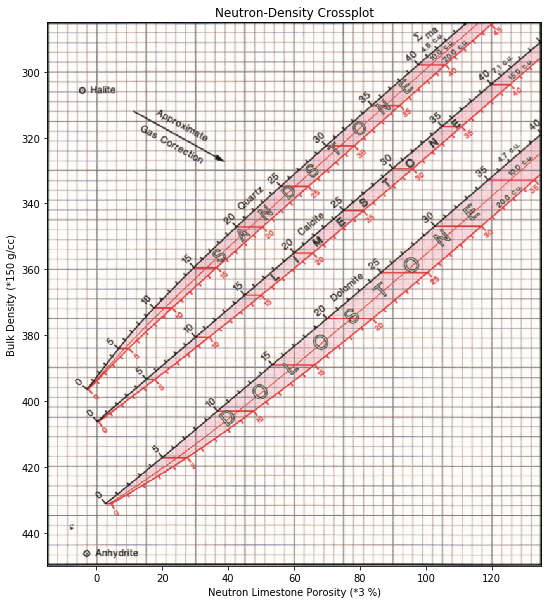

In [26]:
xratio = 3; yratio = 150
extent = [-5 * xratio, 45 * xratio, 3 * yratio, 1.9 * yratio] # format: (x axis 1, x axis 2, y axis 1, y axis 2) 
plt.figure(figsize=(20, 10))
plt.imshow(neutron_density_xplot, extent=extent)
plt.title("Neutron-Density Crossplot")
plt.xlabel("Neutron Limestone Porosity (*3 %)"); plt.ylabel("Bulk Density (*150 g/cc)")

# ***

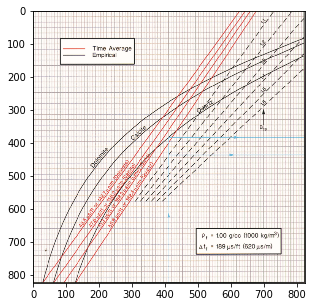

In [0]:
sphi = plt.imread('/content/reservoir-qi/well-log-charts/Fig 14-2 traveltime_to_sonicporosity.PNG')
plt.figure(figsize=(15, 5))
plt.imshow(sphi)

Text(0, 0.5, 'Sonic Porosity (%)')

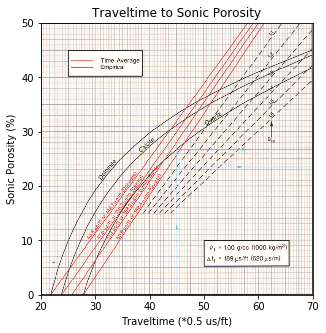

In [0]:
extent = (20, 70, 0, 50) # format: (x axis 1, x axis 2, y axis 1, y axis 2)
plt.figure(figsize=(5, 5))
plt.imshow(sphi, extent=extent)
plt.title("Traveltime to Sonic Porosity")
plt.xlabel("Traveltime (*0.5 us/ft)"); plt.ylabel("Sonic Porosity (%)")